---
# <center> Лабораторна робота №5 </center>
## __Тема. Алгоритми пошуку__
## __Мета:__ Засвоїти варіанти реалізації алгоритмів пошуку засобами Python і 
методи оцінювання їх складності
Викoнав Данііл Танасієнко 10.12.24
---

# <center> Хід роботи </center>

## 1) Оцінити асимптотичну складність алгоритму лінійного пошуку в О-нотації.


In [11]:
def linear_search(arr, target):
    """
    Лінійний пошук у списку.
    
    Параметри:
    - arr: список елементів
    - target: шуканий елемент
    
    Повертає:
    - Індекс елемента, якщо знайдено, або -1, якщо не знайдено.
    """
    for i in range(len(arr)):
        if arr[i] == target:
            return i  # Знайдено, повертаємо індекс
    return -1  # Не знайдено

# Приклад використання
arr = [10, 20, 30, 40, 50]
target = 30

result = linear_search(arr, target)
if result != -1:
    print(f"Елемент {target} знайдено на індексі {result}.")
else:
    print(f"Елемент {target} не знайдено.")


Елемент 30 знайдено на індексі 2.


### Оцінка асимптотичної складності алгоритму лінійного пошуку

Алгоритм лінійного пошуку має асимптотичну складність:

 - **Найгірший випадок**: $O(n)$, коли елемент знаходиться в кінці списку або його немає. У цьому випадку потрібно перевірити всі елементи списку.
 - **Найкращий випадок**: $O(1)$, коли елемент знаходиться на першій позиції.
 - **Середній випадок**: $O(n)$, оскільки в середньому необхідно перевірити половину елементів.

## 2) Oцінити асимптотичну складність алгоритму бінарного пошуку в О-нотації.

In [14]:
# Реалізація алгоритму бінарного пошуку
def binary_search(arr, target):
    """
    Бінарний пошук у відсортованому списку.
    
    Параметри:
    - arr: відсортований список елементів
    - target: шуканий елемент
    
    Повертає:
    - Індекс елемента, якщо знайдено, або -1, якщо не знайдено.
    """
    low = 0
    high = len(arr) - 1
    
    while low <= high:
        mid = (low + high) // 2
        if arr[mid] == target:
            return mid  # Знайдено, повертаємо індекс
        elif arr[mid] < target:
            low = mid + 1  # Шукаємо у правій частині
        else:
            high = mid - 1  # Шукаємо у лівій частині
    
    return -1  # Не знайдено

# Приклад використання
arr = [10, 20, 30, 40, 50, 1488]
target = 1488

result = binary_search(arr, target)
if result != -1:
    print(f"Елемент {target} знайдено на індексі {result}.")
else:
    print(f"Елемент {target} не знайдено.")

Елемент 1488 знайдено на індексі 5.


### Оцінка асимптотичної складності алгоритму бінарного пошуку
Алгоритм бінарного пошуку має асимптотичну складність:

 - **Найгірший випадок**: $O(\log n)$, оскільки на кожному кроці алгоритм зменшує розмір пошукової області в два рази.
 - **Найкращий випадок**: $O(1)$, коли шуканий елемент знаходиться в середині списку.
 - **Середній випадок**: $O(\log n)$, так як у середньому кількість операцій для знаходження елемента також буде пропорційна логарифму від розміру масиву.

## 3) Написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції linear_searh();

In [30]:
import pandas as pd
import time
import random

# Реалізація функції linear_search
def linear_search(arr, target):
    for i, val in enumerate(arr):
        if val == target:
            return i
    return -1

# Функція для створення датафрейму
def measure_linear_search():
    results = []  # Список для збереження результатів
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Розміри масивів для тестування
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо масив розміру n
        target = random.randint(0, n - 1)  # Випадковий елемент як ціль
        
        # Засікаємо час виконання лінійного пошуку
        start_time = time.time()
        for _ in range(10):  # Виконати 10 разів, щоб стабілізувати час
            linear_search(arr, target)
        end_time = time.time()
        
        # Обчислюємо середній час
        elapsed_time = (end_time - start_time) / 10  # Середній час
        results.append({"n": n, "time": elapsed_time})  # Зберігаємо результат
    
    # Створюємо датафрейм з результатів
    df = pd.DataFrame(results)
    return df

# Використання функції
df = measure_linear_search()
print(df)

       n      time
0     10  0.000000
1    100  0.000000
2   1000  0.000000
3   5000  0.000100
4  10000  0.000700
5  50000  0.005001


## 4) − написати функцію, яка б могла повертати датафрейм з таким складом полів: («n», «time»), де n – розмір масиву для функції bin_searh()

In [55]:
import pandas as pd
import time
import random

# Функція для бінарного пошуку
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Функція для вимірювання часу виконання бінарного пошуку для різних розмірів масивів
def benchmark_binary_search():
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Різні розміри масивів
    data = []  # Список для збереження результатів
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо відсортований масив
        target = random.randint(0, n - 1)  # Випадковий елемент для пошуку
        
        # Засікаємо час виконання за допомогою time.perf_counter() для точніших вимірювань
        start_time = time.perf_counter()
        for _ in range(100):  # Виконуємо 100 разів для кращої точності
            binary_search(arr, target)
        end_time = time.perf_counter()
        
        # Обчислюємо середній час
        average_time = (end_time - start_time) / 100
        data.append({"n": n, "time": average_time})
    
    # Створюємо датафрейм
    df = pd.DataFrame(data)
    return df

# Викликаємо функцію
df = benchmark_binary_search()
print(df)



       n      time
0     10  0.000001
1    100  0.000003
2   1000  0.000006
3   5000  0.000010
4  10000  0.000008
5  50000  0.000006


## 5) За результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву.


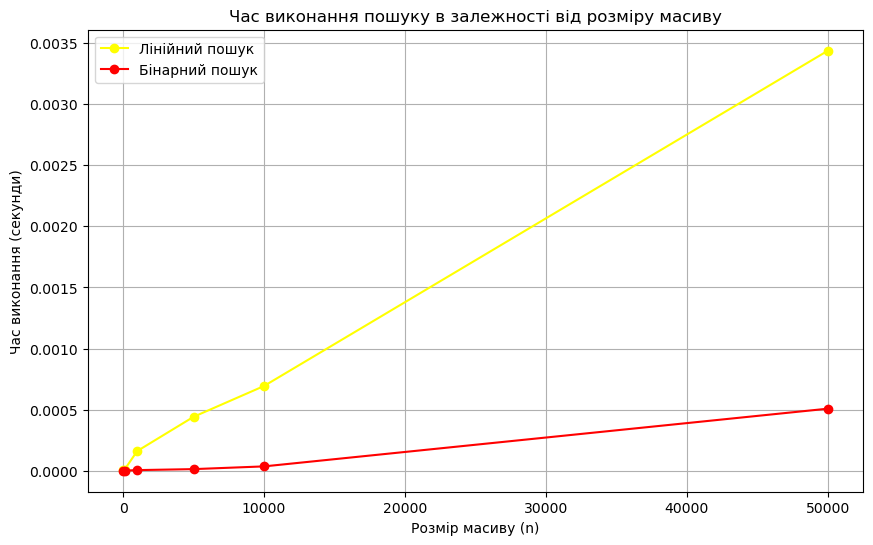

In [62]:
import pandas as pd
import timeit
import random
import matplotlib.pyplot as plt

# Реалізація функції linear_search
def linear_search(arr, target):
    for i, val in enumerate(arr):
        if val == target:
            return i
    return -1

# Реалізація функції binary_search
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2  # Знаходимо середній індекс
        if arr[mid] == target:    # Якщо середній елемент — шуканий
            return mid
        elif arr[mid] < target:   # Шуканий елемент у правій половині
            left = mid + 1
        else:                     # Шуканий елемент у лівій половині
            right = mid - 1
    return -1  # Елемент не знайдено

# Функція для вимірювання часу для лінійного пошуку
def measure_linear_search():
    results = []  # Список для збереження результатів
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Розміри масивів для тестування
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо масив розміру n
        target = random.randint(0, n - 1)  # Випадковий елемент як ціль
        
        stmt = f"linear_search({arr}, {target})"
        setup = "from __main__ import linear_search"
        elapsed_time = timeit.timeit(stmt, setup, number=10)  # Виконуємо 10 разів
        
        results.append({"n": n, "time": elapsed_time / 10})  # Обчислюємо середній час
    
    # Створюємо датафрейм з результатів
    df = pd.DataFrame(results)
    return df

# Функція для вимірювання часу для бінарного пошуку
def measure_binary_search():
    results = []  # Список для збереження результатів
    sizes = [10, 100, 1000, 5000, 10000, 50000]  # Розміри масивів для тестування
    
    for n in sizes:
        arr = list(range(n))  # Генеруємо відсортований масив розміру n
        target = random.randint(0, n - 1)  # Випадковий елемент як ціль
        
        stmt = f"binary_search({arr}, {target})"
        setup = "from __main__ import binary_search"
        elapsed_time = timeit.timeit(stmt, setup, number=10)  # Виконуємо 10 разів
        
        results.append({"n": n, "time": elapsed_time / 10})  # Обчислюємо середній час
    
    # Створюємо датафрейм з результатів
    df = pd.DataFrame(results)
    return df

# Виконання обох вимірювань
df_linear = measure_linear_search()
df_binary = measure_binary_search()

# Побудова графіків
plt.figure(figsize=(10, 6))

# Лінійний пошук
plt.plot(df_linear['n'], df_linear['time'], label='Лінійний пошук', marker='o', color='yellow')

# Бінарний пошук
plt.plot(df_binary['n'], df_binary['time'], label='Бінарний пошук', marker='o', color='red')

# Додавання заголовка та підписів
plt.title('Час виконання пошуку в залежності від розміру масиву')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час виконання (секунди)')
plt.legend()

# Відображення графіку
plt.grid(True)
plt.show()

## 6) Оцінити, який з двох алгоритмів є ефективнішим і в якому діапазоні розміру задачі.

З графіків, побудованих раніше, можна побачити, що лінійний пошук зростає пропорційно розміру масиву, а бінарний пошук — набагато повільніше. На малих розмірах масивів час виконання обох алгоритмів може бути схожим, але на великих масивах бінарний пошук стане значно ефективнішим

# <center> Контрольні питання </center>

# Сформулювати задачу пошуку

**Задача:**  
Дано масив чисел $A = [a_1, a_2, \dots, a_n]$, де $n$ — розмір масиву. Потрібно знайти індекс елемента $x$, який задовольняє умову $A[i] = x$, або повернути $-1$, якщо такого елемента немає.

---



1. **Вхідні дані:**
   - Масив $A$, який може бути:
     - **Необов'язково відсортованим** (для лінійного пошуку).
     - **Відсортованим за зростанням** (для бінарного пошуку).
   - Шуканий елемент $x$, який потрібно знайти.

2. **Вихідні дані:**
   - Індекс елемента $x$ у масиві $A$, якщо він існує.
   - Значення $-1$, якщо елемент $x$ у масиві відсутній.

3. **Обмеження:**
   - $n > 0$ — масив не порожній.
   - Масив може містити повторювані елементи, але алгоритми повертають індекс першого знайденого

# Які критерії можна використовувати для оцінювання ефективності алгоритмів пошуку?

## 1. **Часова складність**
   - Визначає, як змінюється час виконання алгоритму залежно від розміру вхідних даних $n$.
   - Класифікація за асимптотичною складністю:
     - **Лінійний пошук**: $O(n)$ — час виконання пропорційний розміру масиву.
     - **Бінарний пошук**: $O(\log n)$ — час виконання зростає логарифмічно зі збільшенням розміру масиву.
   - Часова складність розглядається для:
     - **Найгіршого випадку** (maximum work required).
     - **Середнього випадку** (expected performance).
     - **Найкращого випадку** (minimum work required).

---

## 2. **Просторова складність**
   - Кількість додаткової пам’яті, необхідної алгоритму для виконання.
   - У більшості алгоритмів пошуку просторова складність:
     - **Лінійний пошук**: $O(1)$ — не потребує додаткової пам’яті.
     - **Бінарний пошук**: $O(1)$ — працює в межах існуючого масиву.

---

## 3. **Стабільність алгоритму**
   - Для алгоритмів, які працюють з масивами з повторюваними елементами, стабільність означає, що алгоритм знаходить перший за порядком елемент, який задовольняє умову пошуку.

---

## 4. **Придатність до різних типів даних**
   - Лінійний пошук можна використовувати на **невідсортованих** масивах.
   - Бінарний пошук працює лише для **відсортованих** масивів.

---

## 5. **Простота реалізації**
   - Лінійний пошук простий у реалізації та розумінні.
   - Бінарний пошук складніший для початківців, особливо під час роботи з рекурсивними підходами.

---

## 6. **Швидкість виконання**
   - Час, який алгоритм витрачає на виконання пошуку, вимірюється на практиці (в реальних умовах) для різних розмірів масиву.

---

## 7. **Гнучкість**
   - Можливість застосування алгоритму до динамічних структур даних, наприклад:
     - Лінійний пошук підходить для списків або потоків даних.
     - Бінарний пошук потребує структур даних, що підтримують швидке сортування.

---

#  Що таке лінійний пошук і яка його асимптотична складність?

## Визначення
Лінійний пошук — це найпростіший алгоритм пошуку, який послідовно перевіряє кожен елемент масиву, доки не знайде шуканий елемент або не перегляне всі елементи.

---

## Алгоритм роботи
1. Почати з першого елемента масиву.
2. Порівнювати поточний елемент із шуканим значенням $x$.
3. Якщо знайдено елемент, повернути його індекс.
4. Якщо після перегляду всіх елементів шуканий не знайдено, повернути $-1$.

---

## Приклад
Дано масив $A = [5, 3, 8, 6]$ і шуканий елемент $x = 8$.
- Починаємо з першого елемента:
  - $5 \neq 8$ — переходимо до наступного.
  - $3 \neq 8$ — переходимо далі.
  - $8 = 8$ — елемент знайдено, повертаємо його індекс (2).

---

## Асимптотична складність

1. **Часова складність:**
   - У найкращому випадку: $O(1)$ (елемент знайдено на першій позиції).
   - У середньому випадку: $O(n/2) \approx O(n)$ (потрібно переглянути половину елементів).
   - У найгіршому випадку: $O(n)$ (елемент розташований у кінці масиву або відсутній).

2. **Просторова складність:**
   - $O(1)$ — алгоритм не потребує додаткової пам’яті, окрім змінної для індексу.

---

## Переваги
- Простота реалізації.
- Можливість роботи з невідсортованими масивами.

## Недоліки
- Низька ефективність для великих масивів.

# Що таке бінарний (двійковий) пошук і в чому полягає його головний принцип роботи?

## Визначення
Бінарний пошук — це алгоритм пошуку, який працює на **відсортованих масивах**. Він повторно ділить масив на дві половини, поступово звужуючи діапазон пошуку.

---

## Головний принцип роботи
1. Порівняти шуканий елемент $x$ із середнім елементом масиву.
2. Якщо $x$ менше за середній елемент, повторити пошук у **лівій половині** масиву.
3. Якщо $x$ більше за середній елемент, повторити пошук у **правій половині** масиву.
4. Якщо середній елемент дорівнює $x$, повернути його індекс.
5. Продовжувати, доки діапазон пошуку не стане порожнім.

---

## Часова складність
- Найгірший і середній випадок: $O(\log n)$.
- Найкращий випадок: $O(1)$ (елемент знайдено одразу).

---

## Головна перевага
Швидке виконання на великих масивах завдяки скороченню діапазону пошуку вдвічі на кожному кроці.

# Порівняння бінарного та лінійного пошуку

## **Переваги бінарного пошуку:**
1. **Швидкість:** Часова складність $O(\log n)$, що значно ефективніше за $O(n)$ лінійного пошуку для великих масивів.
2. **Придатність для великих даних:** Значно швидше знаходить елемент у великих відсортованих масивах.

---

## **Недоліки бінарного пошуку:**
1. **Вимога сортування:** Масив має бути відсортований, що може зайняти $O(n \log n)$ часу.
2. **Складність реалізації:** Бінарний пошук складніший у програмуванні та розумінні для початківців.
3. **Непридатність для динамічних даних:** Не працює на змінних чи несортованих структурах.

---

## **Переваги лінійного пошуку:**
1. **Простота:** Легкий у реалізації та розумінні.
2. **Універсальність:** Працює на несортованих масивах або потоках даних.

---

## **Недоліки лінійного пошуку:**
1. **Повільність:** Часова складність $O(n)$ робить його неефективним для великих масивів.


# Які ще алгоритми пошуку існують, окрім лінійного і бінарного?

1. **Індексований пошук**:
   - Пошук через індексацію елементів, наприклад, за допомогою хеш-таблиць.
   - Швидкість пошуку: $O(1)$ у середньому випадку.

2. **Пошук у дереві**:
   - Алгоритми пошуку в бінарних деревах пошуку (BST), AVL-деревах, червоних-чорних деревах.
   - Часова складність: $O(\log n)$ для збалансованих дерев.

3. **Пошук за допомогою хешування**:
   - Використовує хеш-таблицю для швидкого пошуку елементів.
   - Часова складність: $O(1)$ у середньому випадку.

4. **Пошук у графах**:
   - **Пошук в глибину (DFS)** і **пошук в ширину (BFS)** використовуються для пошуку в графах або на сітках.
   - Часова складність: $O(V + E)$, де $V$ — кількість вершин, $E$ — кількість ребер.

5. **Пошук в інтервальних деревах**:
   - Використовується для пошуку елементів у відрізках або діапазонах.
   - Часова складність: $O(\log n)$.

6. **Пошук за допомогою двійкового дерева відсічень**:
   - Використовується для пошуку елементів у відсортованих даних, що підходить для операцій типу "менше або рівно" чи "більше або рівно".
